In [33]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import src.utils.globals as g
from src.utils.noise import NoiseMachine, NoiseFactory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
ids = ['6640-102140-1'] #Real Anomalies: 6640-101992-1|2022-02-24|02:31:26
df_start = pd.read_parquet(g.path_tracks)
df_in = df_start[df_start['robotid'].isin(ids)]

seqids = df_in['seqid'].unique()
randseq = np.random.choice(seqids, 1)[0]
df_seq = df_in[df_in['seqid'] == randseq]

print(randseq)

6640-102140-1|2024-01-24|03:28:12


In [ ]:
def plot_dfs(dfs, title="", colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(dfs)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()

    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (name, df) in enumerate(dfs.items()):
        NoiseMachine._plot(data=df, ax=axes[i])

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title)
    plt.tight_layout()

    # Show the plot
    plt.show()
    

6640-101992-1|2021-11-24|02:38:10


AttributeError: 'Axes' object has no attribute 'flatten'

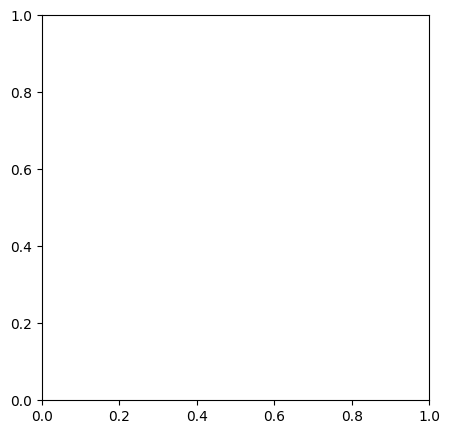

In [113]:
ids = ['6640-101992-1']
df_in = df_start[df_start['robotid'].isin(ids)]
seqids = df_in['seqid'].unique()
randseq = np.random.choice(seqids, 1)[0]
df_seq = df_in[df_in['seqid'] == randseq]

print(randseq)

plot_dfs({"a" : NoiseMachine.no_anomaly(df_seq.copy())})

C:\Users\Luuk Verkleij\AppData\Local\Temp\ipykernel_24888\4275647134.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


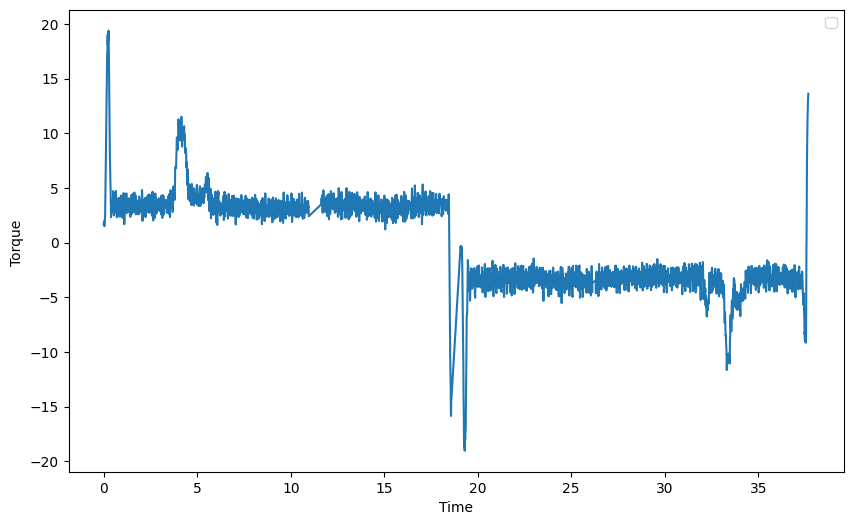

In [123]:
df_tmp = NoiseMachine.no_anomaly(df_seq.copy())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_tmp['timeindex'], df_tmp['torqueactual'])
plt.xlabel('Time')
plt.ylabel('Torque ')
plt.legend()
plt.show()

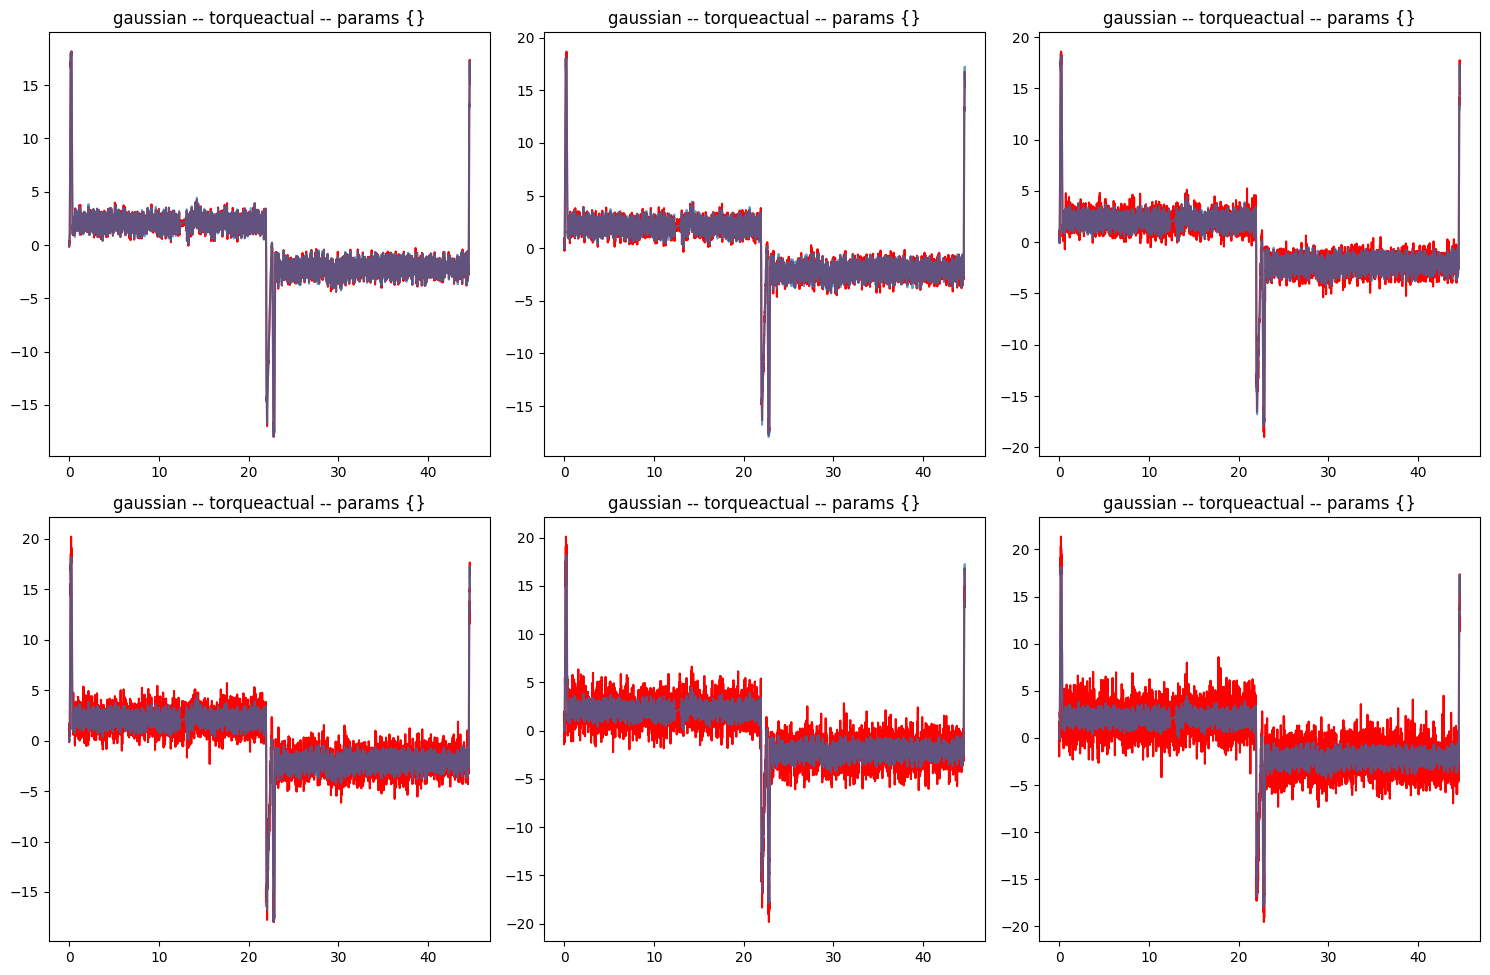

In [6]:
dfs_gaussian = {}
for x in [0.05, 0.1, 0.2,  0.3, 0.4, 0.5]:
    dfs_gaussian[f'gaussian_{x}'] = NoiseMachine.gaussian_anomaly(df_seq.copy(), x)

plot_dfs(dfs_gaussian)

         timeindex_bin                                    seqid  \
5044323            704  6640-102140-1|2023-10-31|07:20:59|sinus   
5044324            705  6640-102140-1|2023-10-31|07:20:59|sinus   
5044325            706  6640-102140-1|2023-10-31|07:20:59|sinus   
5044326            707  6640-102140-1|2023-10-31|07:20:59|sinus   
5044327            708  6640-102140-1|2023-10-31|07:20:59|sinus   
...                ...                                      ...   
5047871           4252  6640-102140-1|2023-10-31|07:20:59|sinus   
5047872           4253  6640-102140-1|2023-10-31|07:20:59|sinus   
5047873           4254  6640-102140-1|2023-10-31|07:20:59|sinus   
5047874           4255  6640-102140-1|2023-10-31|07:20:59|sinus   
5047875           4256  6640-102140-1|2023-10-31|07:20:59|sinus   

               robotid        date      time  timeindex  motorposition  \
5044323  6640-102140-1  2023-10-31  07:20:59      6.338       4006.119   
5044324  6640-102140-1  2023-10-31  07:20:59   

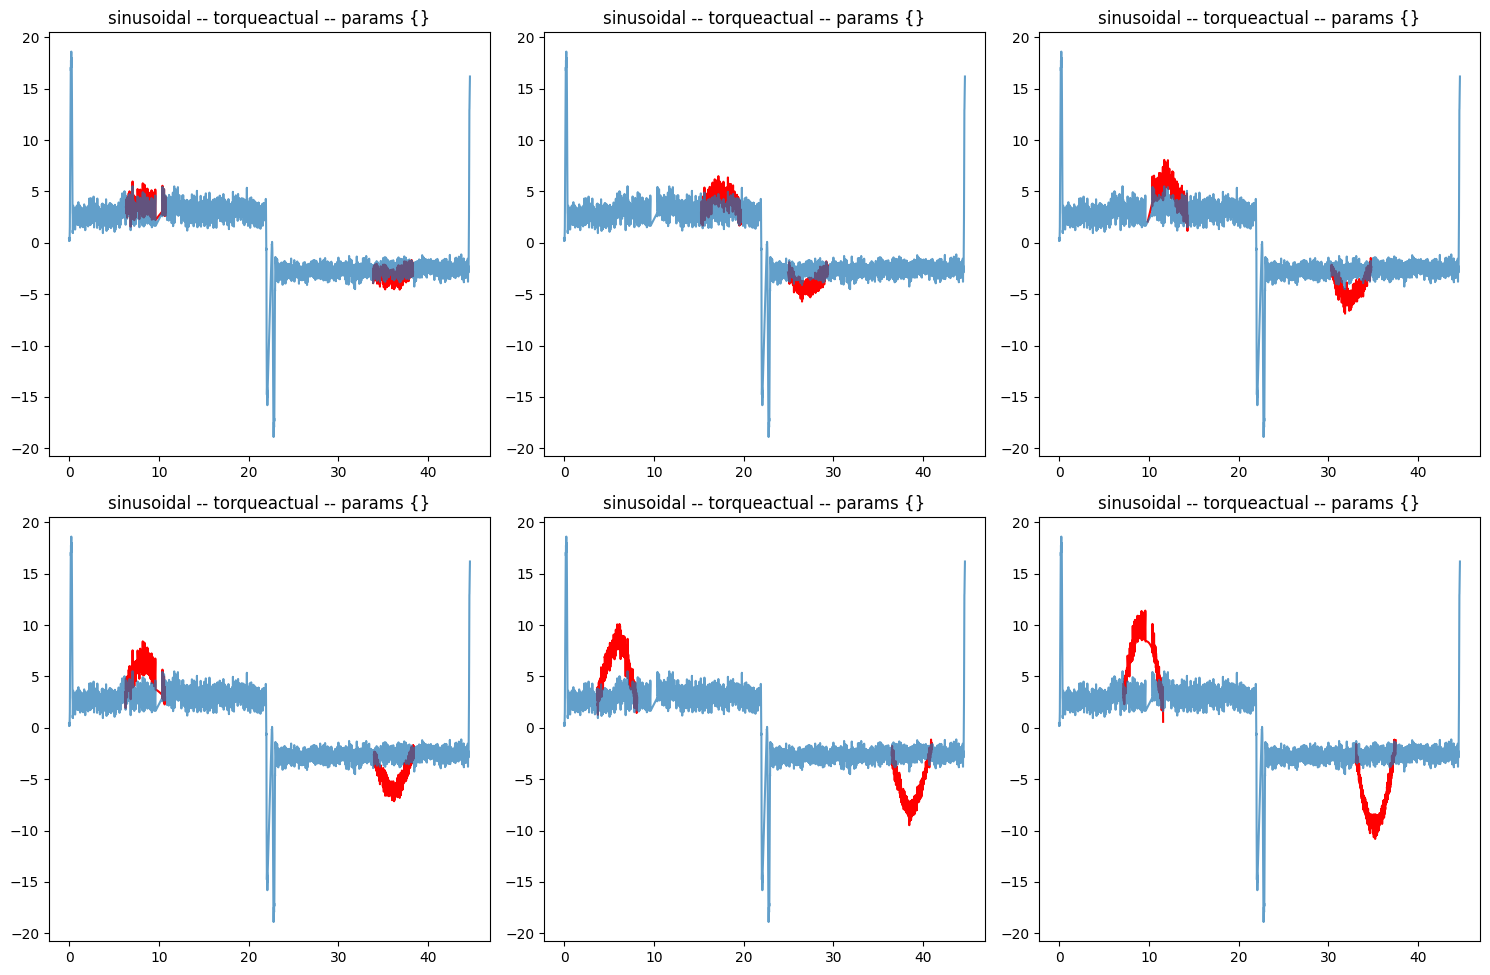

In [11]:
dfs_sinusoidal = {}
for x in [0.25, 0.5, 0.75, 1, 1.5, 2]:
    dfs_sinusoidal[f'sinusoidal_{x}'] = NoiseMachine.sinusoidal_anomaly(df_seq.copy(), 0.2, x)

plot_dfs(dfs_sinusoidal)

5048388   -2.33337
5045743    2.22455
5046530   -3.25914
5043912    1.97068
5048262   -2.58127
Name: torqueactual, dtype: float64
[3.74973069 6.31221223 4.44797265 3.17992303 3.72695737]
[-3.74973069  6.31221223 -4.44797265  3.17992303 -3.72695737]
5044591    2.57784
5047179   -1.33633
5045262    2.99471
5047812   -3.42076
5046554   -3.06579
Name: torqueactual, dtype: float64
[18.29878133 10.79383061  7.76682731 13.57075192 11.63111465]
[ 18.29878133 -10.79383061   7.76682731 -13.57075192 -11.63111465]
5044604    3.04652
5045440    3.68918
5045923    2.33872
5046372   -2.88438
5048380   -3.14908
Name: torqueactual, dtype: float64
[85.16575174 57.33566347 26.39505788 45.71001136 30.66920926]
[ 85.16575174  57.33566347  26.39505788 -45.71001136 -30.66920926]
5045079    2.42539
5047306   -3.46263
5044354    2.61629
5043869    3.11486
5045113    2.76746
Name: torqueactual, dtype: float64
[527.48009004 280.5727668  185.81682084 514.90856008 357.44854023]
[ 527.48009004 -280.5727668   185.81

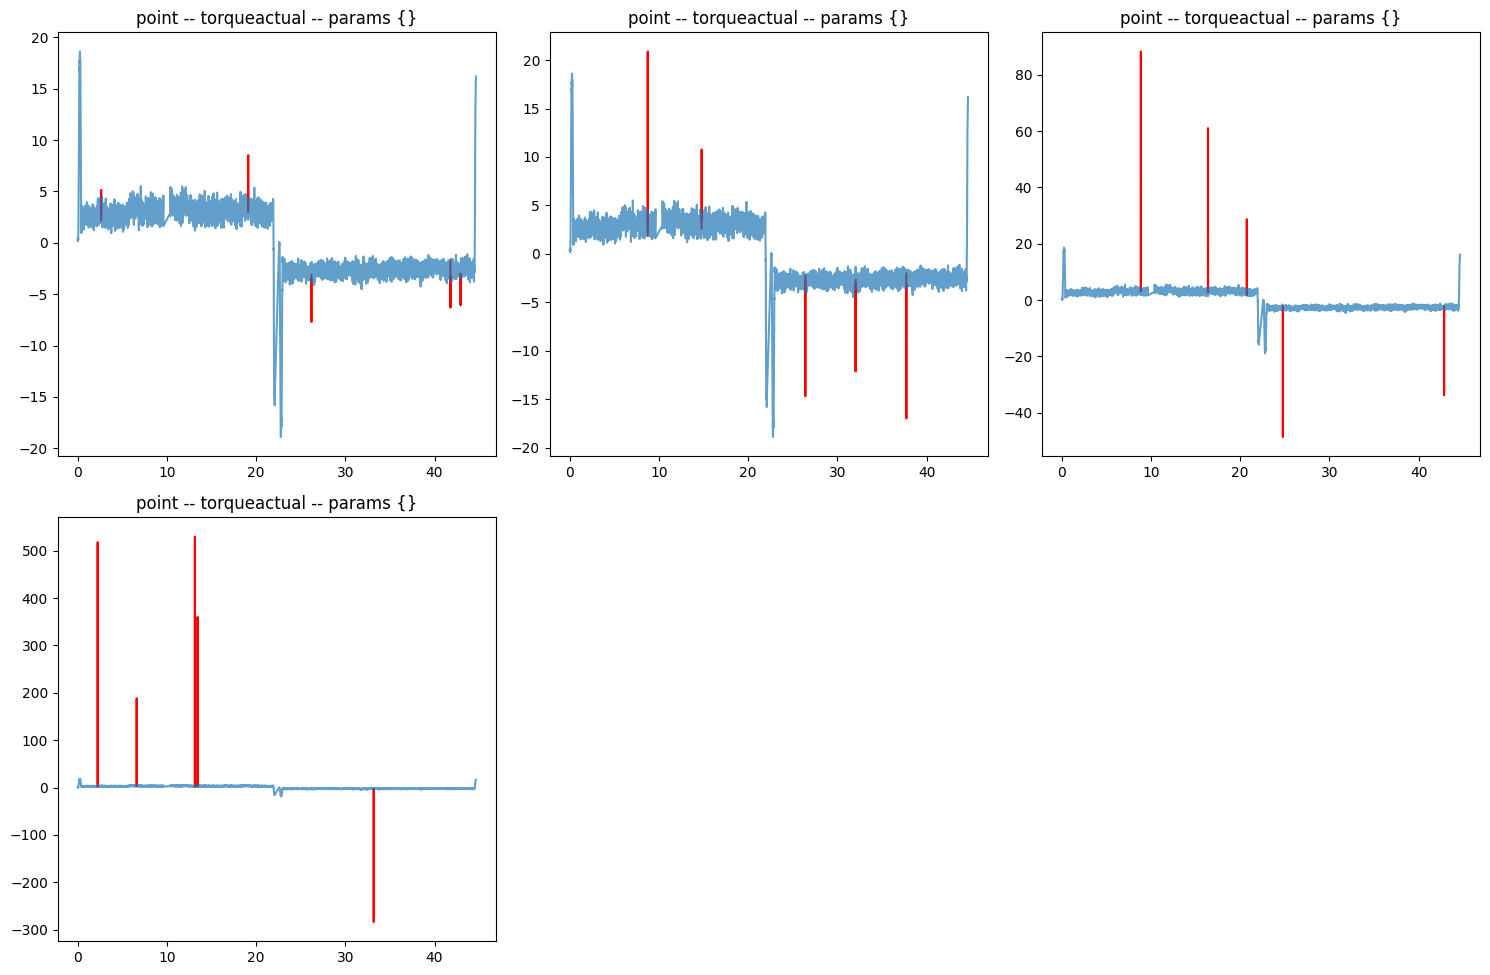

In [13]:
dfs_point = {}
for x in [1, 5, 10, 100]:
    dfs_point[f'point_{x}'] = NoiseMachine.point_anomaly(df_seq.copy(), 5, x)

plot_dfs(dfs_point)